# ARIMA Models

Source: https://people.duke.edu/~rnau/411arim.htm

ARIMA models are, in theory, the most general class of models for forecasting a time series which can be made to be “stationary” by differencing (if necessary). 

Reminder: A random variable that is a time series is stationary if its statistical properties are all constant over time.  A stationary series has no trend, its variations around its mean have a constant amplitude, and it wiggles in a consistent fashion, i.e., its short-term random time patterns always look the same in a statistical sense.  The latter condition means that its autocorrelations (correlations with its own prior deviations from the mean) remain constant over time, or equivalently, that its power spectrum remains constant over time.  

A random variable of this form can be viewed (as usual) as a combination of signal and noise, and the signal (if one is apparent) could be a pattern of fast or slow mean reversion, or sinusoidal oscillation, or rapid alternation in sign, and it could also have a seasonal component.  

An ARIMA model can be viewed as a “filter” that tries to separate the signal from the noise, and the signal is then extrapolated into the future to obtain forecasts.

## ARIMA, Identifying order of differencing

In [1]:
from pandas import read_csv
from pandas import datetime
from pandas.core import datetools
from pandas import Series, DataFrame
import pandas as pd
from matplotlib import pyplot as plt

series = read_csv(r'E:\AUA\Spring 2018 - 2019\MGMT 328 Advanced Topics in Data Analysis\winnebago.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())

C:\Users\Gaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Month
1966-11-01    61.0
1966-12-01    48.0
1967-01-01    53.0
1967-02-01    78.0
1967-03-01    75.0
Name: Sales, dtype: float64


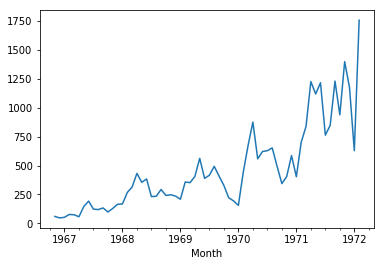

In [2]:
# Draw time series graph
series.plot()
plt.show()

In [3]:
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

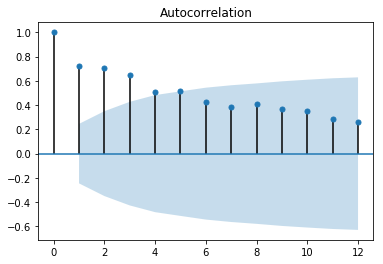

In [4]:
plot_acf(series,lags=12)

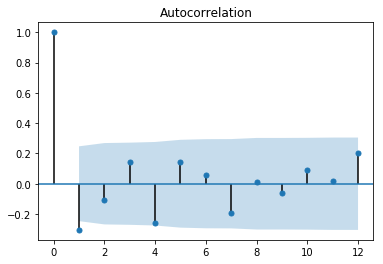

In [5]:
diff = series.diff(periods=1)
diff.dropna(inplace=True)
plot_acf(diff,lags=12)

Assignment: Check that standard deviation of the series has decreased after first differencing. 

In [6]:
print (series.std())

374.5662981454007


In [7]:
print (diff.std())

223.25400383960587


Assignment: Check that additional order of differencing is not required

In [8]:
diff2 = series.diff(periods=2)
diff2.dropna(inplace=True)
print (diff2.std())

224.94561067753312


In [9]:
print (diff2.std())

224.94561067753312


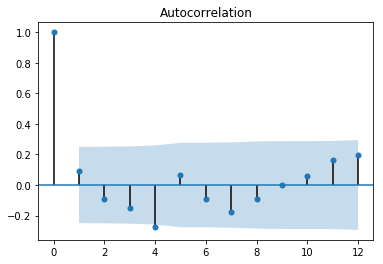

In [10]:
plot_acf(diff2,lags=12)

Draw a plot of stationarized data series (1st difference). 

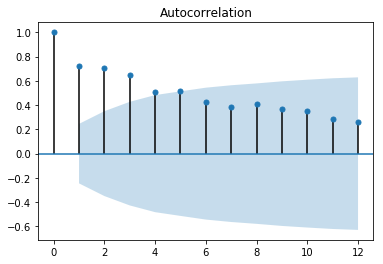

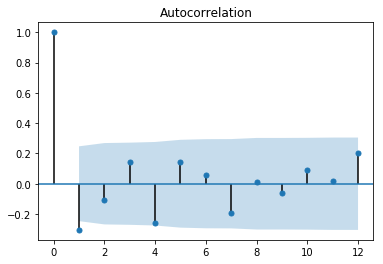

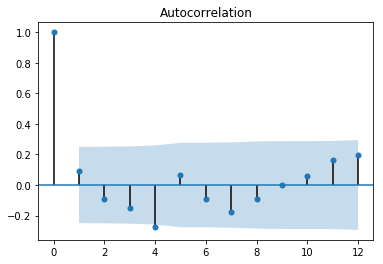

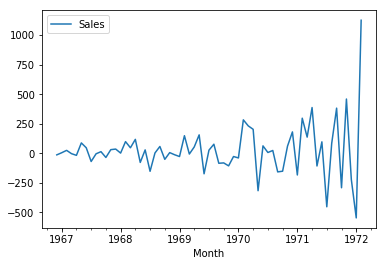

In [11]:
pd.DataFrame(diff).plot()
plt.show()

Do variance after diif1 if var diff2 not significant decrease leave..

## Identifying AR and MA signatures

Assignment. Looking at the ACF plot above, identify whether the model needs AR or MA signature:

AR signatures:

If the PACF displays a sharp cutoff while the ACF decays more slowly (i.e., has significant spikes at higher lags), we say that the stationarized series displays an "AR signature," meaning that the autocorrelation pattern can be explained more easily by adding AR terms than by adding MA terms. You will probably find that an AR signature is commonly associated with positive autocorrelation at lag 1--i.e., it tends to arise in series which are slightly underdifferenced. The reason for this is that an AR term can act like a "partial difference" in the forecasting equation. For example, in an AR(1) model, the AR term acts like a first difference if the autoregressive coefficient is equal to 1, it does nothing if the autoregressive coefficient is zero, and it acts like a partial difference if the coefficient is between 0 and 1. So, if the series is slightly underdifferenced--i.e. if the nonstationary pattern of positive autocorrelation has not completely been eliminated, it will "ask for" a partial difference by displaying an AR signature. Hence, we have the following rule of thumb for determining when to add AR terms:

RULE: If the PACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive--i.e., if the series appears slightly "underdifferenced"--then consider adding an AR term to the model. The lag at which the PACF cuts off is the indicated number of AR terms.

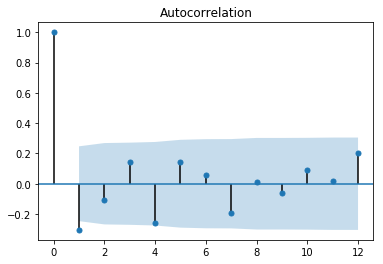

In [12]:
plot_acf(diff,lags=12)

#Inspect the following autocorrelation plots and decided wether the rule stated above is applicable to this case. 

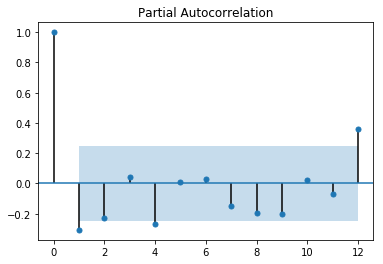

In [13]:
plot_pacf(diff,lags=12)

# Provide your answer and justification here:
We don't need to add +1 to p.. so we leave ARIMA (0,1,0)
- both ACF and PACF graph demonstrates significant spike only at lag 1

MA signatures:

An MA signature is commonly associated with negative autocorrelation at lag 1--i.e., it tends to arise in series which are slightly overdifferenced. The reason for this is that an MA term can "partially cancel" an order of differencing in the forecasting equation. To see this, recall that an ARIMA(0,1,1) model without constant is equivalent to a Simple Exponential Smoothing model. The forecasting equation for this model is

$\hat{Y}_t = μ + Y_{t-1} - \theta_1 e_{t-1}$

where the MA(1) coefficient θ1 corresponds to the quantity 1- α in the Simple Exponential Smoothing (SES) model. If θ1 is equal to 1, this corresponds to an SES model with α =0, which is just a CONSTANT model because the forecast is never updated. This means that when θ1 is equal to 1, it is actually cancelling out the differencing operation that ordinarily enables the SES forecast to re-anchor itself on the last observation. On the other hand, if the moving-average coefficient is equal to 0, this model reduces to a random walk model--i.e., it leaves the differencing operation alone. So, if θ1 is something greater than 0, it is as if we are partially cancelling an order of differencing . If the series is already slightly overdifferenced--i.e., if negative autocorrelation has been introduced--then it will "ask for" a difference to be partly cancelled by displaying an MA signature. (A lot of arm-waving is going on here! A more rigorous explanation of this effect is found in the Mathematical Structure of ARIMA Models handout.) Hence the following additional rule of thumb:

RULE: If the ACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is negative--i.e., if the series appears slightly "overdifferenced"--then consider adding an MA term to the model. The lag at which the ACF cuts off is the indicated number of MA terms.
    

In [14]:
# Provide your answer and justification here:


## Implementing ARIMA

In [15]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\Gaya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Gaya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   63
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -422.188
Method:                       css-mle   S.D. of innovations            195.875
Date:                Thu, 16 May 2019   AIC                            850.375
Time:                        00:09:07   BIC                            856.805
Sample:                    12-01-1966   HQIC                           852.904
                         - 02-01-1972                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            19.6262      8.165      2.404      0.019       3.623      35.629
ma.L1.D.Sales    -0.6826      0.152     -4.486      0.000      -0.981      -0.384
                                    Root

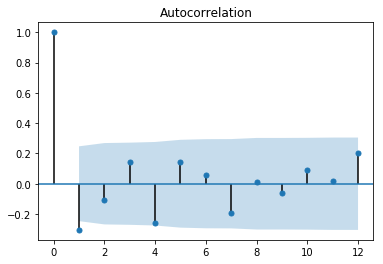

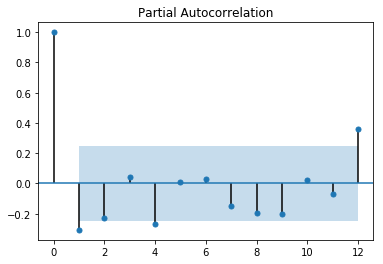

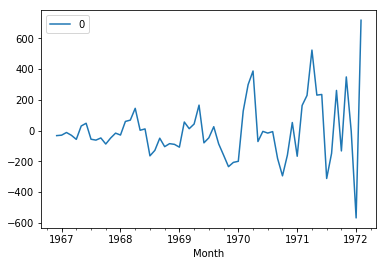

                0
count   63.000000
mean    -1.164395
std    197.466904
min   -567.913369
25%    -96.977639
50%    -29.818022
75%     54.163252
max    717.732827


In [16]:
# fit model
model = ARIMA(series, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
print(residuals.describe())

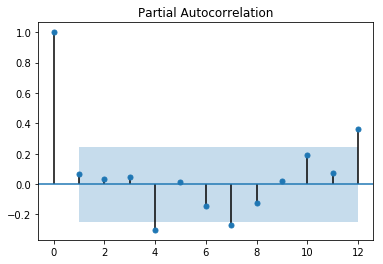

In [17]:
plot_acf(residuals,lags=12)
plot_pacf(residuals,lags=12)

Assignment. Now test your model with autorima, which is a module that optimally selects (p,d,q) for your model

In [19]:
from pmdarima.arima import auto_arima

stepwise_fit = auto_arima(series, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=False, d=1, D=1, trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=True)  # set to stepwise

stepwise_fit.summary()

Fit ARIMA: order=(1, 1, 1); AIC=851.067, BIC=859.639, Fit time=0.250 seconds
Fit ARIMA: order=(0, 1, 0); AIC=863.225, BIC=867.512, Fit time=0.016 seconds
Fit ARIMA: order=(1, 1, 0); AIC=855.160, BIC=861.590, Fit time=0.136 seconds
Fit ARIMA: order=(0, 1, 1); AIC=850.375, BIC=856.805, Fit time=0.164 seconds
Fit ARIMA: order=(0, 1, 2); AIC=851.345, BIC=859.917, Fit time=0.198 seconds
Fit ARIMA: order=(1, 1, 2); AIC=852.374, BIC=863.089, Fit time=0.386 seconds
Total fit time: 1.354 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   63
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -422.188
Method:                       css-mle   S.D. of innovations            195.875
Date:                Thu, 16 May 2019   AIC                            850.375
Time:                        00:09:48   BIC                            856.805
Sample:                             1   HQIC                           852.904
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6262      8.165      2.404      0.019       3.623      35.629
ma.L1.D.y     -0.6826      0.152     -4.486      0.000      -0.981      -0.384
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4650           +0.0000j            1.4650            0.0000
-----------------------------------------------------------------------------
"""